In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 23 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (6,926 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120903 files and dire

In [ ]:
import pandas as pd
from datetime import datetime
import re
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/DACON_data_analytics

/content/drive/MyDrive/DACON_data_analytics


In [ ]:
%pwd

'/content/drive/MyDrive/DACON_data_analytics'

In [ ]:
df_competition = pd.read_csv("competition_info.csv")
df_participate = pd.read_csv("participate_log.csv")
df_talk = pd.read_csv("talk_log.csv")
df_codeshare = pd.read_csv("codeshare_log.csv")
df_submission = pd.read_csv("submission_log.csv")

# 데이터 사전 정보 확인

In [ ]:
df_competition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          149 non-null    object 
 1   대회명         149 non-null    object 
 2   키워드         149 non-null    object 
 3   시작시간        149 non-null    object 
 4   종료시간        149 non-null    object 
 5   참여자 수       149 non-null    int64  
 6   상금 정보       110 non-null    object 
 7   최대 팀원 수     149 non-null    float64
 8   수상자 수       149 non-null    int64  
 9   일일 제출횟수     149 non-null    float64
 10  평가산식        149 non-null    object 
 11  참가조건 여부     149 non-null    int64  
 12  연습가능 여부     149 non-null    int64  
 13  아이디어 대회 여부  149 non-null    int64  
 14  월간 데이콘 여부   149 non-null    int64  
 15  대회 개요       149 non-null    object 
 16  데이터 설명      146 non-null    object 
 17  일정          149 non-null    object 
 18  상금 상세정보     149 non-null    object 
 19  규칙          149 non-null    o

In [ ]:
df_competition.describe()

,참여자 수,최대 팀원 수,수상자 수,일일 제출횟수,참가조건 여부,연습가능 여부,아이디어 대회 여부,월간 데이콘 여부
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,932.704698,4.342282,5.120805,19.020134,0.026846,0.845638,0.167785,0.281879
std,558.565834,1.483111,3.015529,80.626891,0.162177,0.362514,0.374936,0.451432
min,27.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,559.000000,3.000000,3.000000,3.000000,0.000000,1.000000,0.000000,0.000000
50%,819.000000,5.000000,4.000000,3.000000,0.000000,1.000000,0.000000,0.000000
75%,1200.000000,5.000000,5.000000,5.000000,0.000000,1.000000,0.000000,1.000000
max,3377.000000,10.000000,20.000000,500.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_competition.head(1)

,ID,대회명,키워드,시작시간,종료시간,참여자 수,상금 정보,최대 팀원 수,수상자 수,일일 제출횟수,평가산식,참가조건 여부,연습가능 여부,아이디어 대회 여부,월간 데이콘 여부,대회 개요,데이터 설명,일정,상금 상세정보,규칙
0,ID_000,대출 상점 총 매출 예측 경진대회,알고리즘 | 정형 | 회귀 | 금융 | RMSE,2018-08-14,2018-09-13,577,"$8,500 + 100,000ZPR",5.0,3,5.0,RMSE,0,1,0,0,"<h2>1.배경</h2><p><span style=""background-color:...","<p>[기초 설명]</p><p><span style=""color: rgb(36, 4...",<p><strong>세부일정</strong></p><p><br></p><ul><li...,"<p><span style=""background-color: transparent;...","<p><br></p><p><span class=""ql-size-large"">A. 구..."


# 전처리

#### 정량 / 정성 데이터 분리

In [ ]:
# 정량 데이터
df_int = df_competition[['참여자 수', '최대 팀원 수', '수상자 수', '일일 제출횟수',	'참가조건 여부', '연습가능 여부', '아이디어 대회 여부',	'월간 데이콘 여부']]

# 정성 데이터
df_string = df_competition.drop(['참여자 수', '최대 팀원 수', '수상자 수', '일일 제출횟수',	'참가조건 여부', '연습가능 여부', '아이디어 대회 여부',	'월간 데이콘 여부'], axis=1)
df_day = df_string[['시작시간', '종료시간', '일정']]
df_point = df_string[['상금 정보', '상금 상세정보']]
df_info = df_string[['ID', '대회명', '키워드', '평가산식', '대회 개요', '데이터 설명', '규칙']]

#### 정량 데이터 전처리 : 데이터 타입 수정 (int)

In [ ]:
# 정량 데이터 전처리 : 데이터 타입 수정
df_str = df_int[['최대 팀원 수', '수상자 수', '일일 제출횟수',	'참가조건 여부', '연습가능 여부', '아이디어 대회 여부',	'월간 데이콘 여부']].astype(str)
df_int = df_int['참여자 수'].astype('int64')

#### 정성 데이터 전처리 : 날짜 데이터 전처리

In [ ]:
# 걸린 기간
df_day['시작시간'] = pd.to_datetime(df_day['시작시간'])
df_day['종료시간'] = pd.to_datetime(df_day['종료시간'])
df_day['걸린기간'] = df_day['종료시간'] - df_day['시작시간']

# 시작 월 & 종료 월
df_day = df_day.astype('str')
df_day['기간'] = df_day['걸린기간'].apply(lambda x : x.replace(" days", ""))
df_day['시작월'] = df_day['시작시간'].apply(lambda x : x[5:7])
df_day['종료월'] = df_day['종료시간'].apply(lambda x : x[5:7])

# 필요없는 속성 삭제 및 데이터 타입 변경(int)
df_day = df_day.drop(['시작시간', '종료시간', '일정', '걸린기간'], axis = 1)
df_day = df_day.astype('int64')
df_day

<ipython-input-11-4f5a03100e4b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day['시작시간'] = pd.to_datetime(df_day['시작시간'])
<ipython-input-11-4f5a03100e4b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day['종료시간'] = pd.to_datetime(df_day['종료시간'])
<ipython-input-11-4f5a03100e4b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

,기간,시작월,종료월
0,30,8,9
1,74,10,12
2,160,2,7
3,102,7,10
4,26,10,10
...,...,...,...
144,42,9,10
145,3,9,9
146,35,9,10
147,28,10,11


#### 정성 데이터 전처리 : 상금 데이터 전처리

In [ ]:
# 상금 정보 텍스트 처리
df_point = df_point.fillna(0)

# 상금 결측치 처리
zero = df_point[df_point['상금 정보'] == 0]

zero2money = []

for i in zero['상금 상세정보']:
    pattern = re.compile(r'(\d+)만원')

    # 정규표현식에 매칭되는 부분을 찾기
    matches = pattern.findall(i)
    money_sum = lambda x : sum(map(int, x))
    zero2money.append(money_sum(matches))

# 상금 텍스트 처리
df_point['상금 정보'] = df_point['상금 정보'].astype("string")
money = []
idx = 0
for i in df_point['상금 정보']:
    if i == 0:
         money.append(len(zero2money[idx]))
         idx += 1
    else:
        money.append(len(re.sub("[()\-ɑα$,+A-Za-z가-힣]","", i).replace(" ", "")))

# 바꾼 텍스트 값을 df_point에 추가
df_point['금액범위'] = money

# 필요없는 속성 삭제 및 데이터 타입 변경(int)
df_point = df_point[["금액범위"]].astype("int64")
df_point

,금액범위
0,10
1,11
2,3
3,3
4,3
...,...
144,4
145,0
146,4
147,3


#### 정성 데이터 전처리 : 대회 정보 전처리

In [ ]:
# 키워드 정리
key_word = []
for i in df_info['키워드']:
    key_word.append(i.replace(" ", "").split("|"))

# 예외적인 내용과 오타가 너무 많음!!!!!!!
# for i in key_word:
#     if "채용" in i:
#         temp = i[0]
#         i.pop(0)
#         i.append(temp)
#     elif i[0] == "제주도":
#         temp = i[0]
#         i.pop(0)
#         i.insert(0, i[-1])
#         i.pop(-1)
#         i.append(temp)
#     elif i[0] == "SW중심대학":
#         temp = i[0]
#         i.pop(0)
#         i.insert(0, "알고리즘")
#         i.append(temp)
#     elif i[0] == "분석 아이디어":
#         temp = i[0]
#         i.pop(0)
#         i.insert(0, "아이디어")
#         i.append(temp)
#     elif i[0] == "운동":
#         temp = i[0]
#         i.pop(0)
#         i.pop(0)
#         i.insert(0, "알고리즘")
#         i.insert(2, temp)
# key_word

# 키워드 순서 변경 및 오타 수정
df_key = pd.DataFrame(key_word, columns = ["개요", "데이터타입", "학습방식", "분야", "평가산식", "기타0", "기타1"])
df_key.to_csv("key_word.csv", index=False)
df_key = pd.read_csv("new_key_word.csv")

# 불필요한 키워드 속성 제거
df_key = df_key[['개요', '데이터타입', '학습방식', '분야']]

# 불필요한 대회 정보 속성 제거
df_info = df_info[['ID', '평가산식']]

df_info_keyword = pd.concat([df_info, df_key], axis = 1)
df_info_keyword

,ID,평가산식,개요,데이터타입,학습방식,분야
0,ID_000,RMSE,알고리즘,정형,회귀,금융
1,ID_001,RMSE,알고리즘,정형,회귀,아파트
2,ID_002,WRMSE,알고리즘,정형,회귀,스포츠
3,ID_003,MAE,알고리즘,정형,회귀,매출
4,ID_004,SMAPE,알고리즘,정형,회귀,공공
...,...,...,...,...,...,...
144,ID_144,정성평가,아이디어,정형,없음,금융
145,ID_145,Macro f1 score,알고리즘,언어,분류,라벨링
146,ID_146,MAE,채용,정형,조선해양,회귀
147,ID_147,Recall,알고리즘,정형,추천시스템,추천


#### 전처리 된 정량 / 정성 데이터 결합

In [ ]:
df_dacon = pd.concat([df_info_keyword, df_day, df_point, df_str, df_int], axis=1)
df_dacon

,ID,평가산식,개요,데이터타입,학습방식,분야,기간,시작월,종료월,금액범위,최대 팀원 수,수상자 수,일일 제출횟수,참가조건 여부,연습가능 여부,아이디어 대회 여부,월간 데이콘 여부,참여자 수
0,ID_000,RMSE,알고리즘,정형,회귀,금융,30,8,9,10,5.0,3,5.0,0,1,0,0,577
1,ID_001,RMSE,알고리즘,정형,회귀,아파트,74,10,12,11,10.0,3,3.0,0,1,0,0,612
2,ID_002,WRMSE,알고리즘,정형,회귀,스포츠,160,2,7,3,5.0,3,3.0,0,1,0,0,1103
3,ID_003,MAE,알고리즘,정형,회귀,매출,102,7,10,3,5.0,3,100.0,0,1,0,0,1416
4,ID_004,SMAPE,알고리즘,정형,회귀,공공,26,10,10,3,4.0,3,3.0,0,1,0,0,789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,ID_144,정성평가,아이디어,정형,없음,금융,42,9,10,4,3.0,10,5.0,0,1,1,0,855
145,ID_145,Macro f1 score,알고리즘,언어,분류,라벨링,3,9,9,0,1.0,5,20.0,0,1,0,1,353
146,ID_146,MAE,채용,정형,조선해양,회귀,35,9,10,4,3.0,5,10.0,1,1,0,0,1137
147,ID_147,Recall,알고리즘,정형,추천시스템,추천,28,10,11,3,5.0,4,3.0,0,1,0,0,946


# EDA

#### 상관관계

In [ ]:
df_dacon_float = df_dacon[['기간', '시작월', '종료월', '금액범위',
       '최대 팀원 수', '수상자 수', '일일 제출횟수', '참가조건 여부', '연습가능 여부', '아이디어 대회 여부',
       '월간 데이콘 여부', '참여자 수']].astype("float64")
df_dacon_float.corr()

,기간,시작월,종료월,금액범위,최대 팀원 수,수상자 수,일일 제출횟수,참가조건 여부,연습가능 여부,아이디어 대회 여부,월간 데이콘 여부,참여자 수
기간,1.000000,-0.126429,-0.074714,0.160523,0.172489,-0.011699,0.168248,0.006626,-0.056497,0.044773,-0.105856,0.098868
시작월,-0.126429,1.000000,0.593408,0.142874,0.149754,-0.110389,-0.143930,0.050107,-0.056098,-0.003927,-0.290107,-0.200641
종료월,-0.074714,0.593408,1.000000,0.202080,0.146192,-0.078738,-0.073960,0.114260,-0.025738,0.039225,-0.240912,-0.238343
금액범위,0.160523,0.142874,0.202080,1.000000,0.237904,-0.038391,-0.171625,0.070003,-0.087488,-0.069073,-0.182027,0.089757
최대 팀원 수,0.172489,0.149754,0.146192,0.237904,1.000000,-0.128660,-0.070971,-0.150827,0.111502,0.114740,-0.165263,0.045080
수상자 수,-0.011699,-0.110389,-0.078738,-0.038391,-0.128660,1.000000,0.149975,-0.048124,-0.001369,0.065617,0.357001,0.034267
일일 제출횟수,0.168248,-0.143930,-0.073960,-0.171625,-0.070971,0.149975,1.000000,-0.029496,-0.038036,0.374494,-0.105413,-0.235677
참가조건 여부,0.006626,0.050107,0.114260,0.070003,-0.150827,-0.048124,-0.029496,1.000000,0.070962,-0.074577,-0.104059,-0.090090
연습가능 여부,-0.056497,-0.056098,-0.025738,-0.087488,0.111502,-0.001369,-0.038036,0.070962,1.000000,-0.056718,0.061239,0.271494
아이디어 대회 여부,0.044773,-0.003927,0.039225,-0.069073,0.114740,0.065617,0.374494,-0.074577,-0.056718,1.000000,-0.081715,-0.205278


In [ ]:
df_dacon_float

,기간,시작월,종료월,금액범위,최대 팀원 수,수상자 수,일일 제출횟수,참가조건 여부,연습가능 여부,아이디어 대회 여부,월간 데이콘 여부,참여자 수
0,30.0,8.0,9.0,10.0,5.0,3.0,5.0,0.0,1.0,0.0,0.0,577.0
1,74.0,10.0,12.0,11.0,10.0,3.0,3.0,0.0,1.0,0.0,0.0,612.0
2,160.0,2.0,7.0,3.0,5.0,3.0,3.0,0.0,1.0,0.0,0.0,1103.0
3,102.0,7.0,10.0,3.0,5.0,3.0,100.0,0.0,1.0,0.0,0.0,1416.0
4,26.0,10.0,10.0,3.0,4.0,3.0,3.0,0.0,1.0,0.0,0.0,789.0
...,...,...,...,...,...,...,...,...,...,...,...,...
144,42.0,9.0,10.0,4.0,3.0,10.0,5.0,0.0,1.0,1.0,0.0,855.0
145,3.0,9.0,9.0,0.0,1.0,5.0,20.0,0.0,1.0,0.0,1.0,353.0
146,35.0,9.0,10.0,4.0,3.0,5.0,10.0,1.0,1.0,0.0,0.0,1137.0
147,28.0,10.0,11.0,3.0,5.0,4.0,3.0,0.0,1.0,0.0,0.0,946.0


#### 참여자 수 기준의 데이터 시각화

In [ ]:
df_dacon.head(3)

,ID,평가산식,개요,데이터타입,학습방식,분야,기간,시작월,종료월,금액범위,최대 팀원 수,수상자 수,일일 제출횟수,참가조건 여부,연습가능 여부,아이디어 대회 여부,월간 데이콘 여부,참여자 수
0,ID_000,RMSE,알고리즘,정형,회귀,금융,30,8,9,10,5.0,3,5.0,0,1,0,0,577
1,ID_001,RMSE,알고리즘,정형,회귀,아파트,74,10,12,11,10.0,3,3.0,0,1,0,0,612
2,ID_002,WRMSE,알고리즘,정형,회귀,스포츠,160,2,7,3,5.0,3,3.0,0,1,0,0,1103


In [ ]:
df_dacon.columns

Index(['ID', '평가산식', '개요', '데이터타입', '학습방식', '분야', '기간', '시작월', '종료월', '금액범위',
       '최대 팀원 수', '수상자 수', '일일 제출횟수', '참가조건 여부', '연습가능 여부', '아이디어 대회 여부',
       '월간 데이콘 여부', '참여자 수'],
      dtype='object')

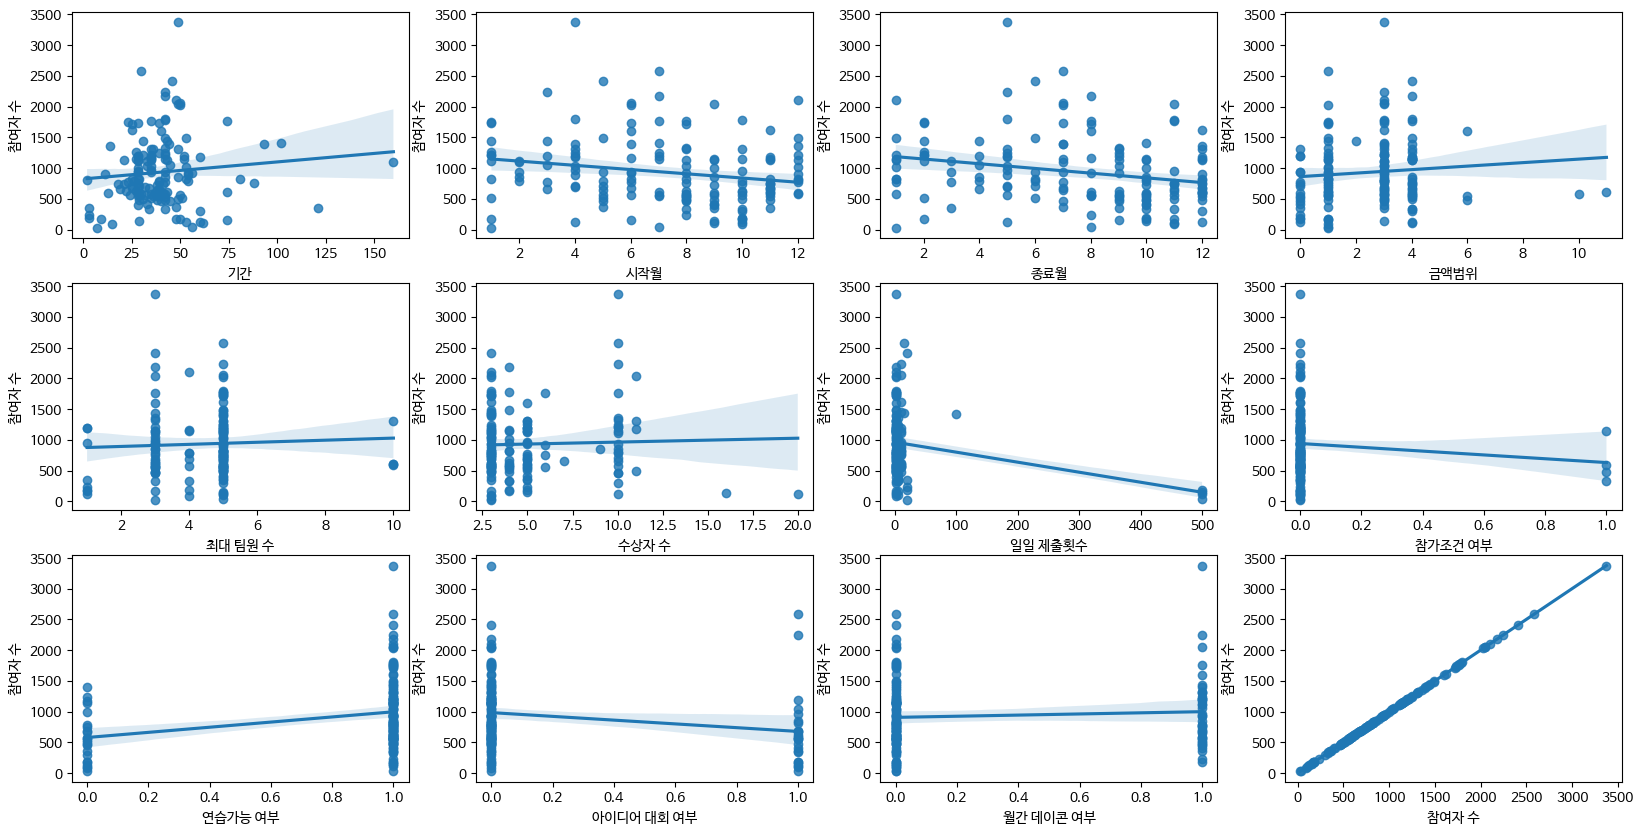

In [ ]:
import seaborn as sns
fig, axs = plt.subplots(figsize=(20,10) , ncols=4 , nrows=3)
lm_features = ['기간', '시작월', '종료월', '금액범위',
       '최대 팀원 수', '수상자 수', '일일 제출횟수', '참가조건 여부', '연습가능 여부', '아이디어 대회 여부',
       '월간 데이콘 여부', '참여자 수']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='참여자 수',data=df_dacon_float, ax=axs[row][col])

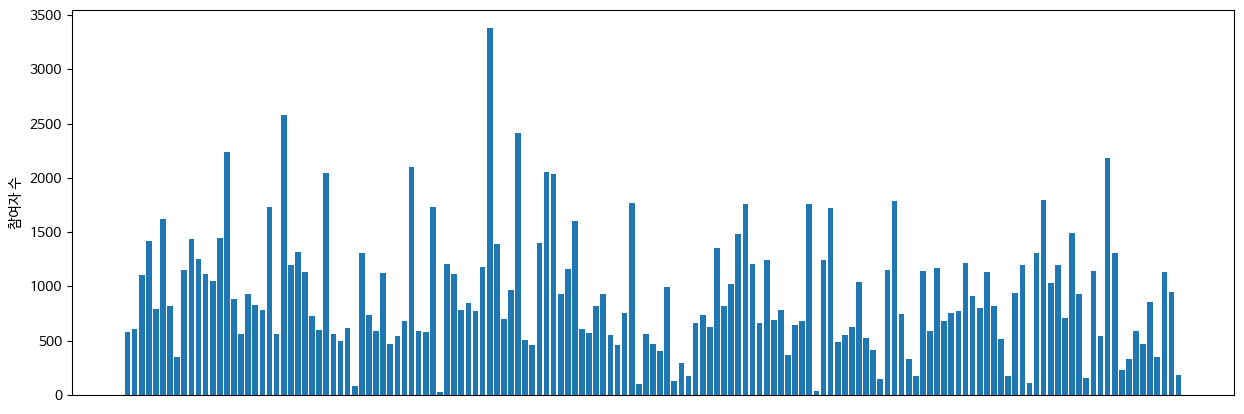

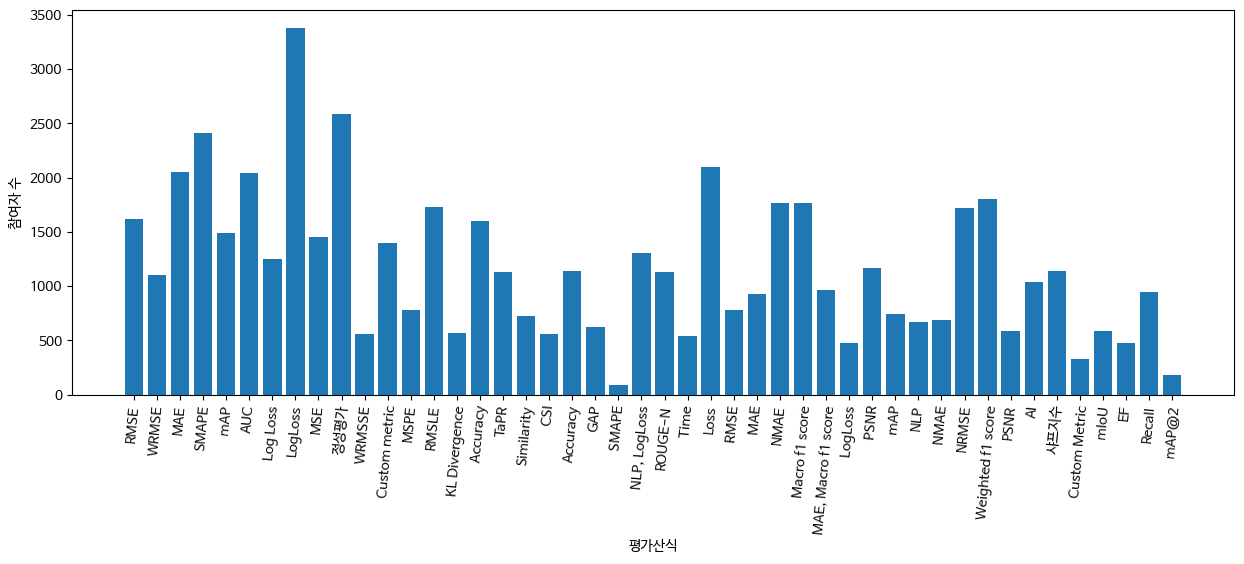

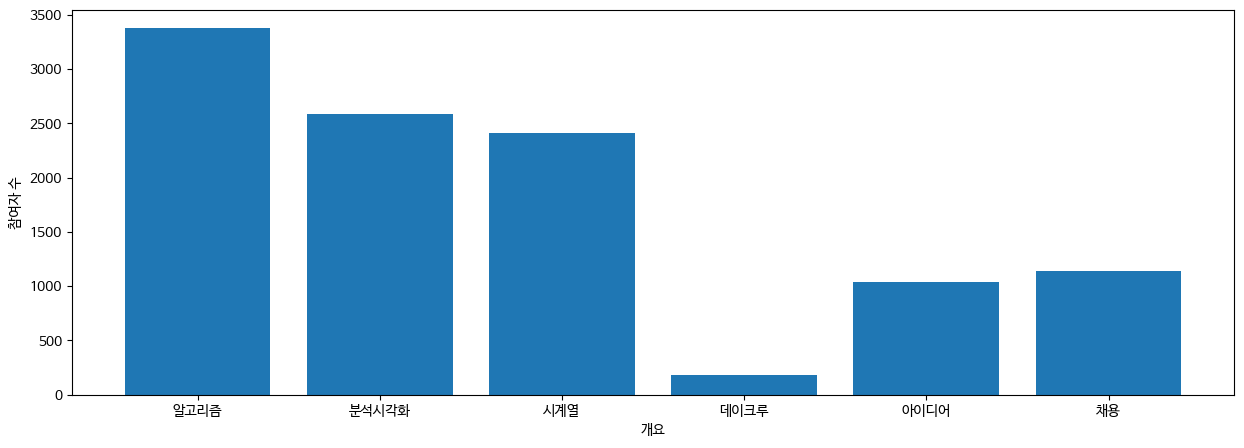

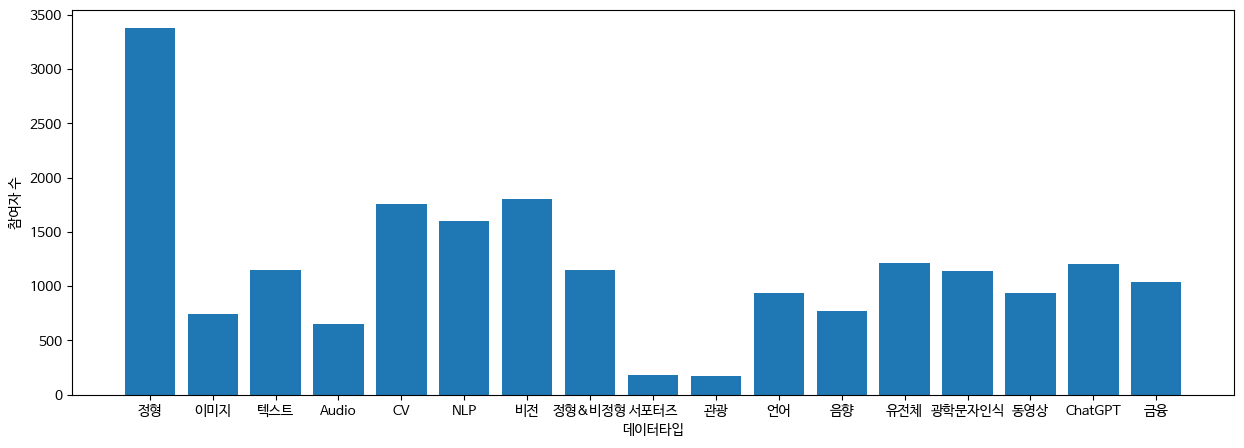

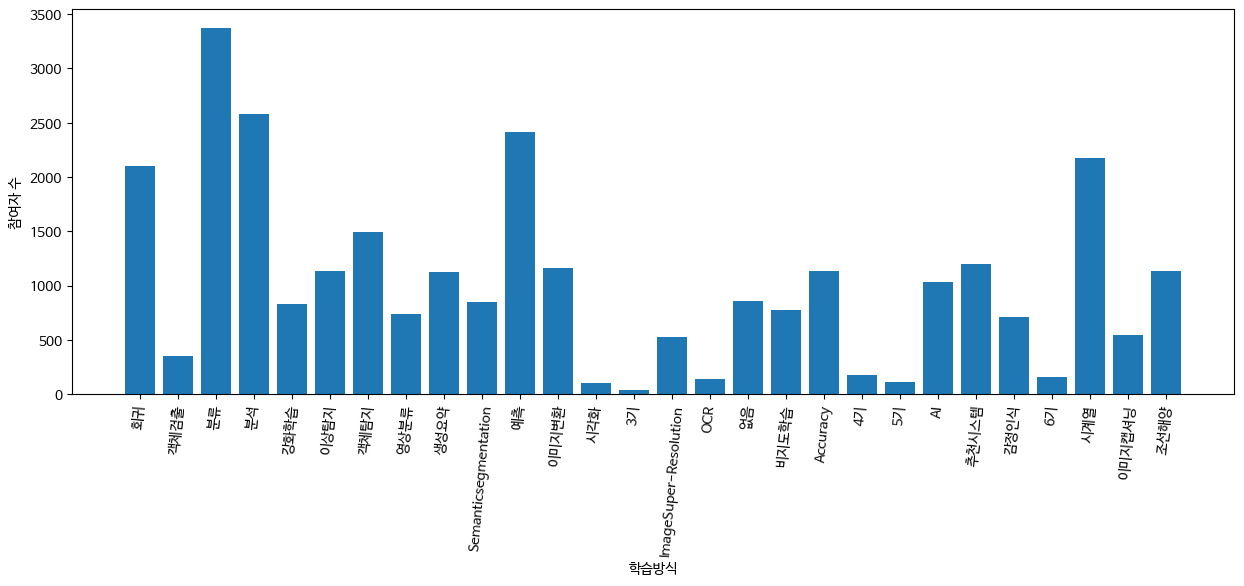

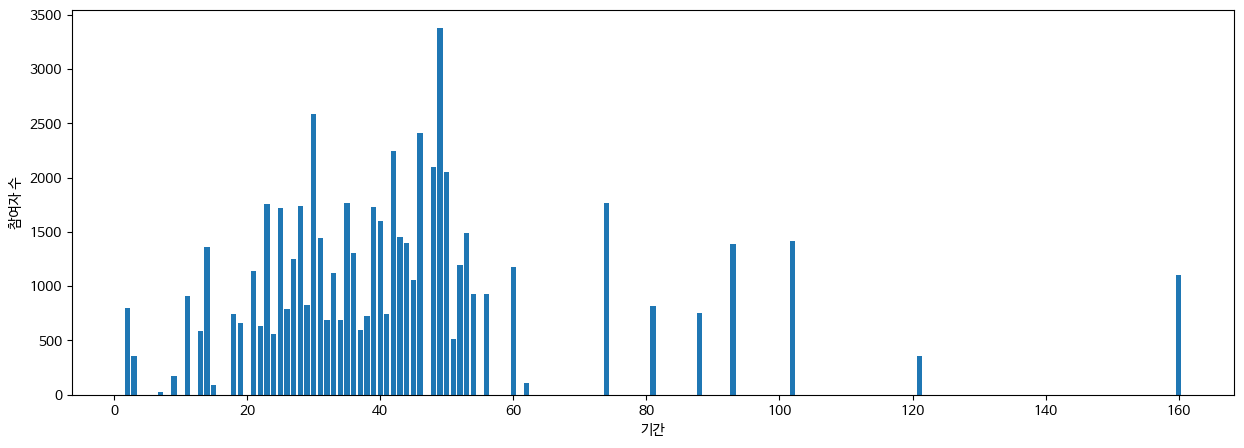

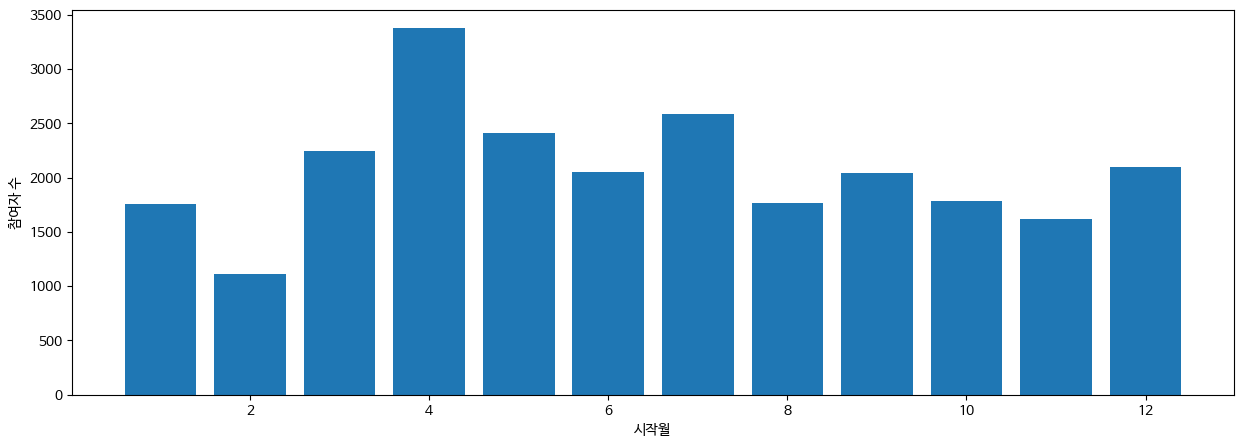

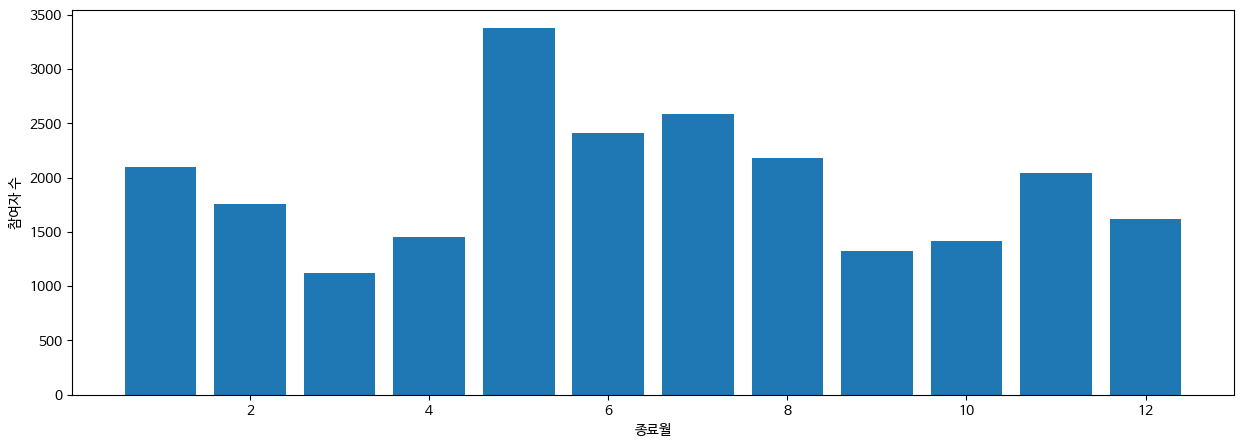

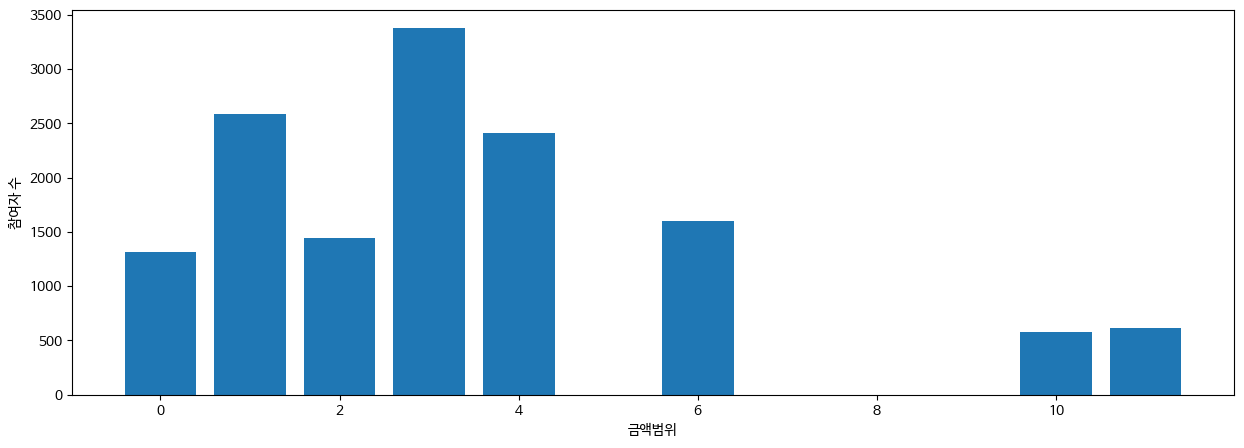

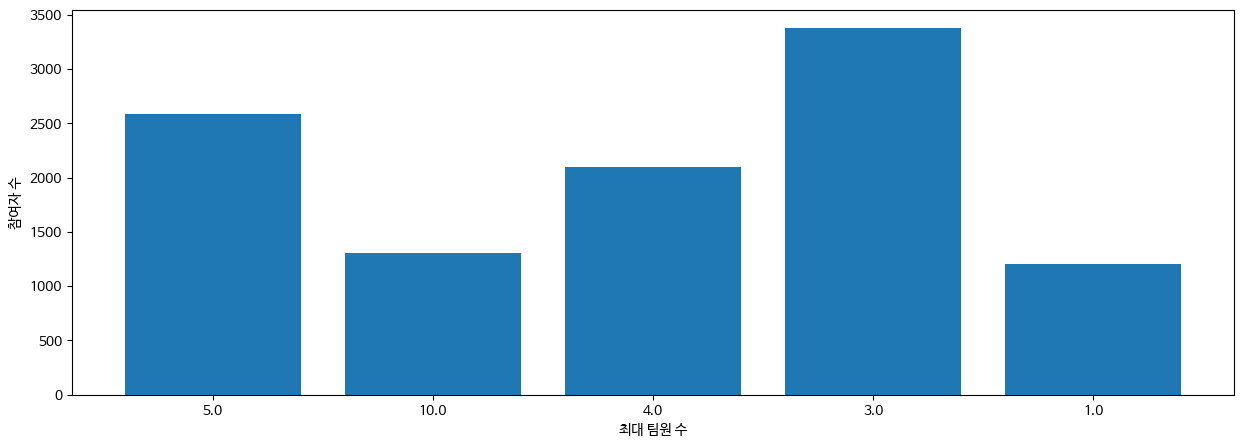

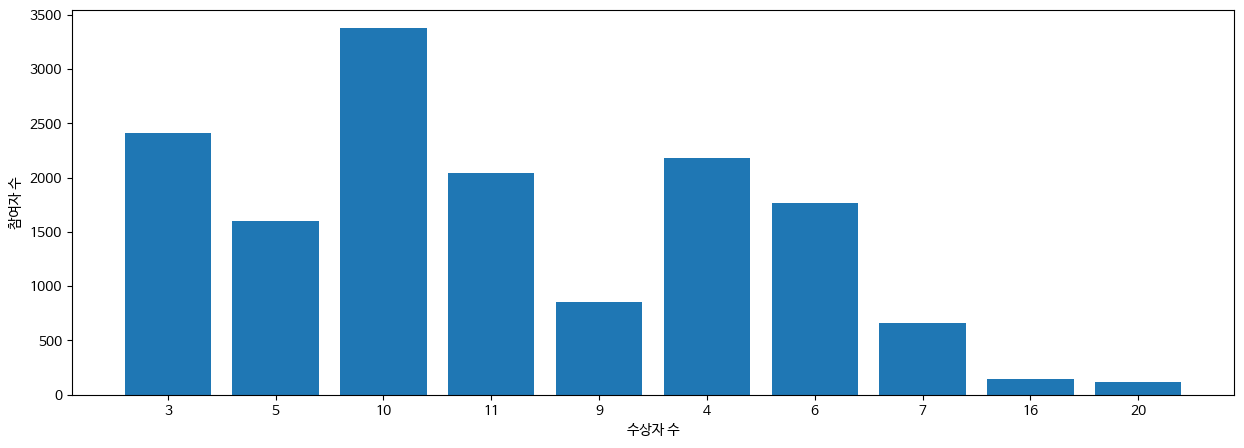

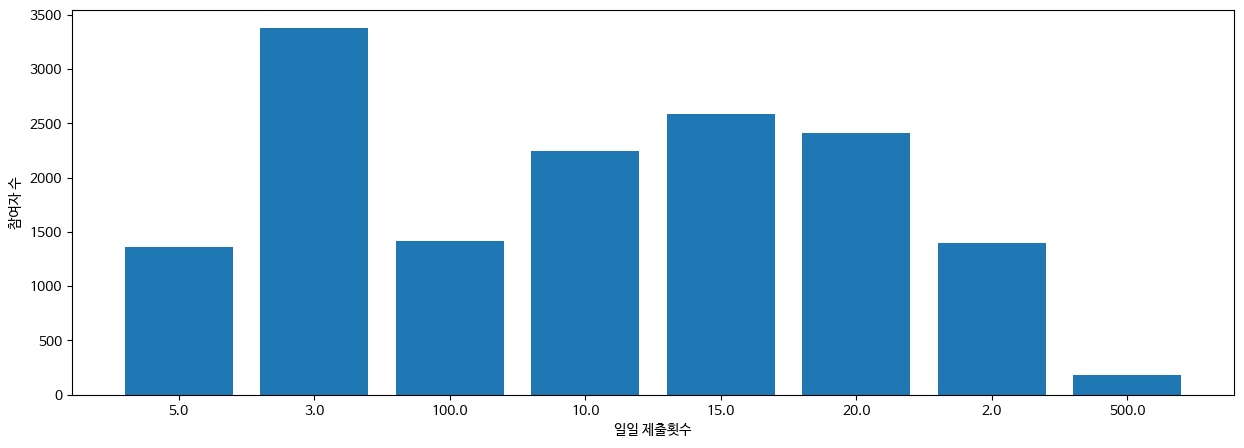

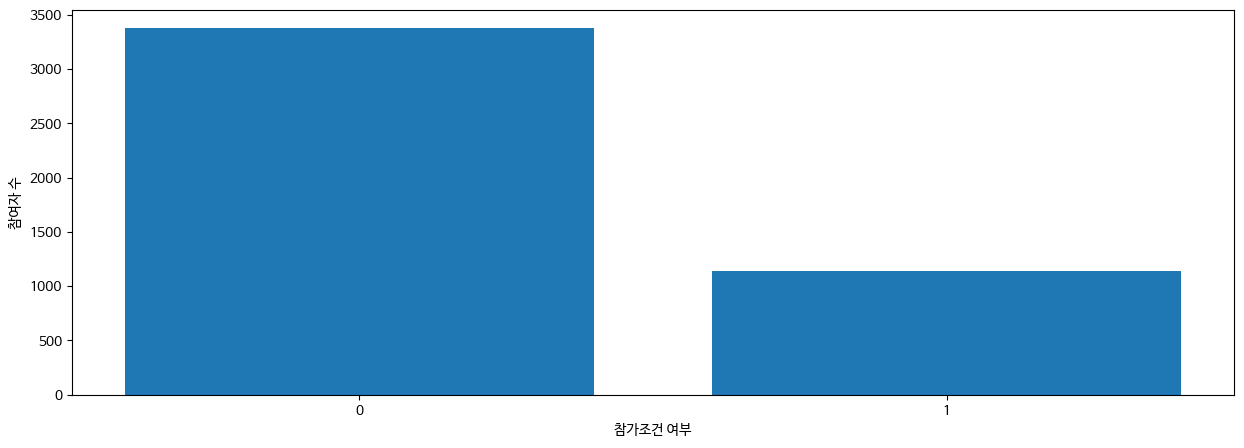

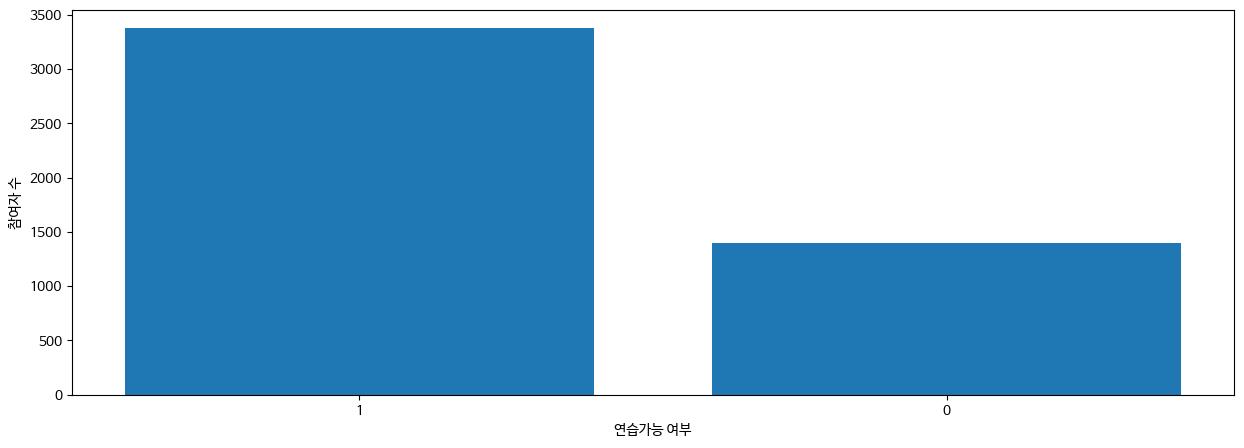

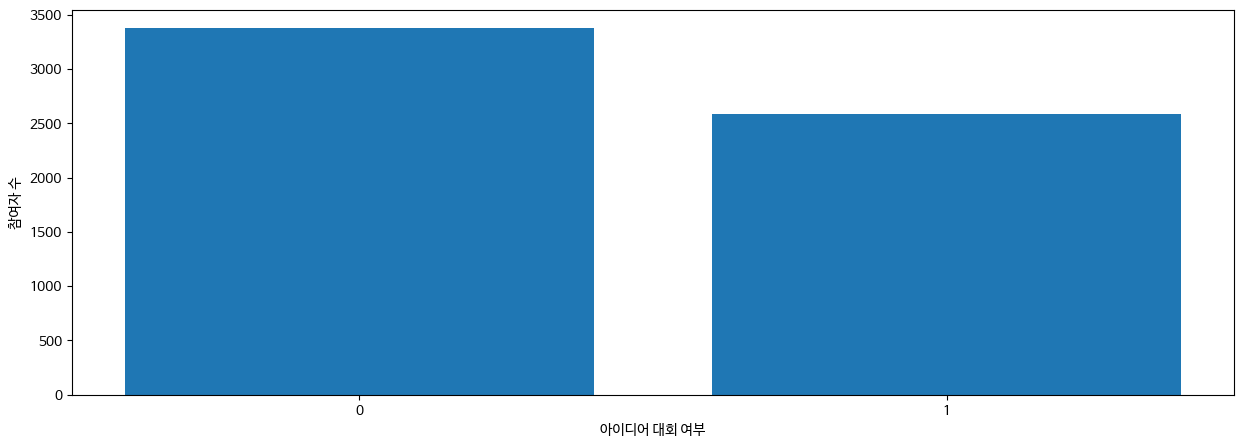

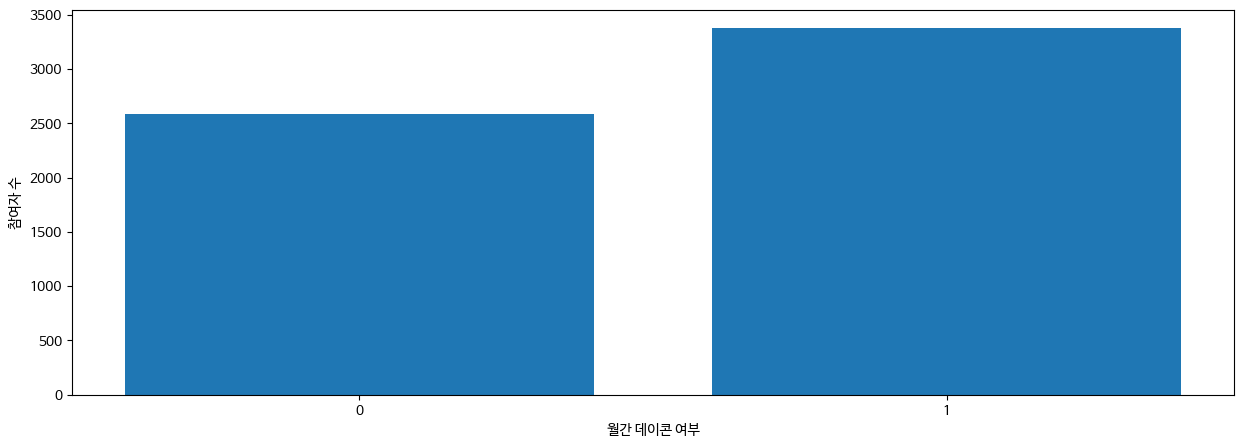

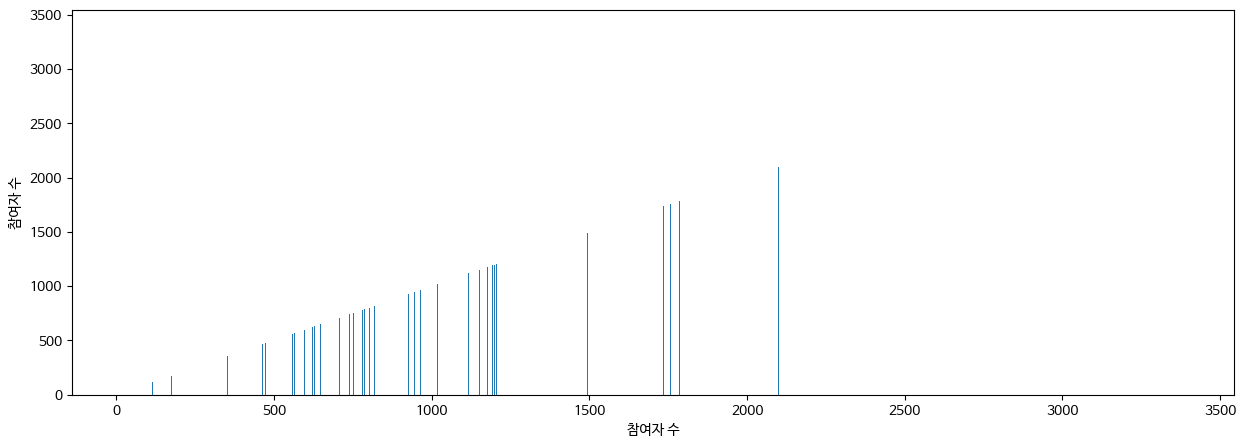

In [ ]:
for i in df_dacon.columns:
    if i == "분야":
        pass
    elif i == "ID":
        plt.figure(figsize=(15, 5))
        plt.bar(df_dacon[i], df_dacon["참여자 수"])
        plt.xlabel(i)
        plt.ylabel('참여자 수')
        plt.gca().axes.xaxis.set_visible(False)
        # plt.show()
        plt.savefig(f'image/{i}.png')
    elif i in ['평가산식', '학습방식']:
        plt.figure(figsize=(15, 5))
        plt.bar(df_dacon[i], df_dacon["참여자 수"])
        plt.xlabel(i)
        plt.ylabel('참여자 수')
        plt.xticks(rotation=85)
        # plt.show()
        plt.savefig(f'image/{i}.png')
    else :
        plt.figure(figsize=(15, 5))
        plt.bar(df_dacon[i], df_dacon["참여자 수"])
        plt.xlabel(i)
        plt.ylabel('참여자 수')
        # plt.show()
        plt.savefig(f'image/{i}.png')